# 0. Knapsack problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import time

# sort weight
weight = [1, 2, 5, 6, 7]
limit_W = 11
value = [1, 6, 18, 22, 28]

dataset = pd.DataFrame({"value": value,
                        "weight": weight})
dataset

,value,weight
0,1,1
1,6,2
2,18,5
3,22,6
4,28,7


# 1. Greedy algorithm
Select by density, if there are same densities, then select by value.

In [2]:
density = [a/b for a, b in zip(value, weight)]
dataset["density"] = density
dataset_sort = dataset.sort_values(by=["density", "value"],
                                  ascending=False)
dataset_sort.reset_index(inplace=True)
dataset_sort

,index,value,weight,density
0,4,28,7,4.000000
1,3,22,6,3.666667
2,2,18,5,3.600000
3,1,6,2,3.000000
4,0,1,1,1.000000


In [3]:
knapsack_i = []
knapsack_v = 0
knapsack_w = 0

for i in range(len(dataset_sort)):
    if (knapsack_w + dataset_sort["weight"][i]) <= limit_W:
        knapsack_i.append(dataset_sort["index"][i])
        knapsack_v = knapsack_v + dataset_sort["value"][i]
        knapsack_w = knapsack_w + dataset_sort["weight"][i]

print("item", knapsack_i)
print("value", knapsack_v)

item [4, 1, 0]
value 35


# 2. Dynamic programming

## 2.1 Subproblem

In [4]:
dy_table = pd.DataFrame(np.zeros((limit_W+1, len(weight)+1)))

dy_table.iloc[weight[0]:, 1] = value[0]
dy_table.iloc[weight[0]:weight[1], 2] = value[0]

for i in range(1, len(weight)):
    dy_table.iloc[:weight[i], i+1] = dy_table.iloc[:weight[i], i]
    for j in range(weight[i], limit_W+1):
        add_i = dy_table.iloc[j-weight[i], i]+value[i]
        not_add_i = dy_table.iloc[j, i]
        if add_i >= not_add_i:
            dy_table.iloc[j, i+1] = add_i
        else:
            dy_table.iloc[j, i+1] = not_add_i
dy_table

,0,1,2,3,4,5
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,1.0,1.0
2,0.0,1.0,6.0,6.0,6.0,6.0
3,0.0,1.0,7.0,7.0,7.0,7.0
4,0.0,1.0,7.0,7.0,7.0,7.0
5,0.0,1.0,7.0,18.0,18.0,18.0
6,0.0,1.0,7.0,19.0,22.0,22.0
7,0.0,1.0,7.0,24.0,24.0,28.0
8,0.0,1.0,7.0,25.0,28.0,29.0
9,0.0,1.0,7.0,25.0,29.0,34.0


In [5]:
item = []
j = limit_W
for i in range(len(weight), 0, -1):
    if dy_table.iloc[j, i-1] != dy_table.iloc[j, i]:
        item.append(i-1)
        j = j - weight[i-1]
print("item", item)
print("value", dy_table.iloc[-1, -1])

item [3, 2]
value 40.0


## 2.2 Q(s,a) table

0.23187971115112305


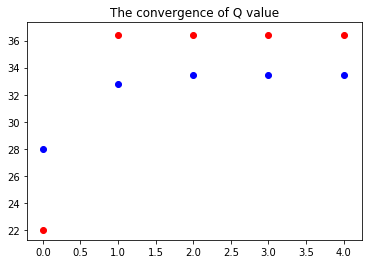

,0,1,2,3,4
[],27.24,29.04,35.6,36.4,33.44
[0],0.00,28.40,22.8,26.8,32.80
[1],23.40,0.00,18.8,22.8,28.80
[2],5.80,6.80,0.0,22.0,-5.00
[3],5.80,6.80,18.0,0.0,-5.00
[4],5.80,6.80,-5.0,-5.0,0.00
"[0, 1]",0.00,0.00,18.0,22.0,28.00
"[0, 2]",0.00,6.00,0.0,-5.0,-5.00
"[0, 3]",0.00,6.00,-5.0,0.0,-5.00
"[0, 4]",0.00,6.00,-5.0,-5.0,0.00


In [6]:
# %% Training Q table
import matplotlib.pyplot as plt
import itertools
from time import time

def get_index(actions):
    index_t = []
    for i in range(len(actions)+1):
        index_t.extend(list(itertools.combinations(actions, i)))
    index_l = []
    for ind in index_t:
        index_l.append(list(ind))
    return index_l


class DPforKnapsack():
    def __init__(self, dataset, actions, index_l, gamma=0.8):
        self.data = dataset
        self.gamma = gamma
        self.index_l = index_l
        self.q_table = pd.DataFrame(np.zeros((len(self.index_l),
                                              len(actions))),
                                    index=[str(i) for i in self.index_l],
                                    columns=actions)

    def rewardWithPenalty(self, next_index, a):
        knapsack_w = np.sum([dataset['weight'][i] for i in next_index])
        if knapsack_w > limit_W:
            r = -5
        else:
            r = self.data['value'][a]
        return r

    def take_action(self, ind, a):
        next_index = self.index_l[ind]+[a]
        next_index.sort()
        return next_index

    def update_q(self, ind, action):
        if len(action) != 0:  # except [0, 1, 2, 3, 4, 5]
            for a in action:
                next_index = self.take_action(ind, a)
                reward = self.rewardWithPenalty(next_index, a)
                # np.max(self.q_table.loc[str(next_index)])
                q_pre = reward + self.gamma * self.q_table.loc[
                        str(next_index), :].max()
                self.q_table.loc[str(self.index_l[ind]), a] = q_pre
        return self.q_table

t1 = time()
plt.close('all')
actions = list(range(len(dataset)))
index_l = get_index(actions)
DP = DPforKnapsack(dataset, actions, index_l)
for episode in range(5):
    for ind in range(len(index_l)):
        action = list(set(actions).difference(set(index_l[ind])))
        q_table_DP = DP.update_q(ind, action)
    plt.scatter(episode, q_table_DP.iloc[0, 3], c='r')
    plt.scatter(episode, q_table_DP.iloc[0, 4], c='b')
print(time()-t1)
plt.title("The convergence of Q value")
plt.show()
q_table_DP

In [7]:
action = []
for i in range(len(dataset)):
    if q_table_DP.loc[str(action)].max() > 0:
        action.append(q_table_DP.loc[str(action)].idxmax())
        action.sort()
print("item", action)
print("value", sum([value[i] for i in action]))

item [2, 3]
value 40
